# Part 1: PCA

## Problem Statement: The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer

import warnings
warnings.filterwarnings("ignore")

###  Q1.1 : Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. 

In [196]:
hsdf = pd.read_csv("Factor-Hair-Revised.csv")

In [180]:
hsdf.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [181]:
hsdf.tail()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4
99,100,7.9,3.0,4.4,5.1,5.9,4.2,4.8,9.7,5.7,3.4,3.5,6.4


In [182]:
hsdf.shape

(100, 13)

In [183]:
hsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [184]:
hsdf.dtypes

ID                int64
ProdQual        float64
Ecom            float64
TechSup         float64
CompRes         float64
Advertising     float64
ProdLine        float64
SalesFImage     float64
ComPricing      float64
WartyClaim      float64
OrdBilling      float64
DelSpeed        float64
Satisfaction    float64
dtype: object

In [185]:
hsdf.isnull().sum().sum()

0

- No null values
- The data looks good for further analysis

In [186]:
hsdf.duplicated().sum()

0

- No duplicate values present

In [187]:
hsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [188]:
hsdf.groupby(['ID']).mean()['Satisfaction'].sort_values(ascending=False)

ID
22     9.9
57     9.0
43     8.9
3      8.9
79     8.9
94     8.9
53     8.7
38     8.7
49     8.7
74     8.6
24     8.6
50     8.6
13     8.4
75     8.2
58     8.2
85     8.2
90     8.2
88     8.2
1      8.2
62     8.0
15     8.0
60     7.9
73     7.9
56     7.7
95     7.7
42     7.6
14     7.6
71     7.6
48     7.6
44     7.6
93     7.6
20     7.6
39     7.6
78     7.6
66     7.6
91     7.4
11     7.4
82     7.4
18     7.4
46     7.4
89     7.3
34     7.3
55     7.3
96     7.3
59     7.1
5      7.1
76     7.1
47     7.1
81     7.1
37     7.1
41     7.0
23     7.0
9      7.0
19     6.8
16     6.6
26     6.6
83     6.6
70     6.6
61     6.6
67     6.4
77     6.4
99     6.4
100    6.4
17     6.4
32     6.4
29     6.3
35     6.3
63     6.3
97     6.3
8      6.3
27     6.3
54     6.1
68     6.1
31     6.1
12     6.0
64     6.0
40     6.0
72     5.8
80     5.7
7      5.7
52     5.7
2      5.7
10     5.5
45     5.5
33     5.4
36     5.4
98     5.4
21     5.4
28     5.4
65     5.4
30     

In [198]:
hs_df = hsdf.copy()

In [199]:
hs_df.drop(['ID'], axis=1, inplace=True)
hs_df.drop(['Satisfaction'], axis=1, inplace=True)

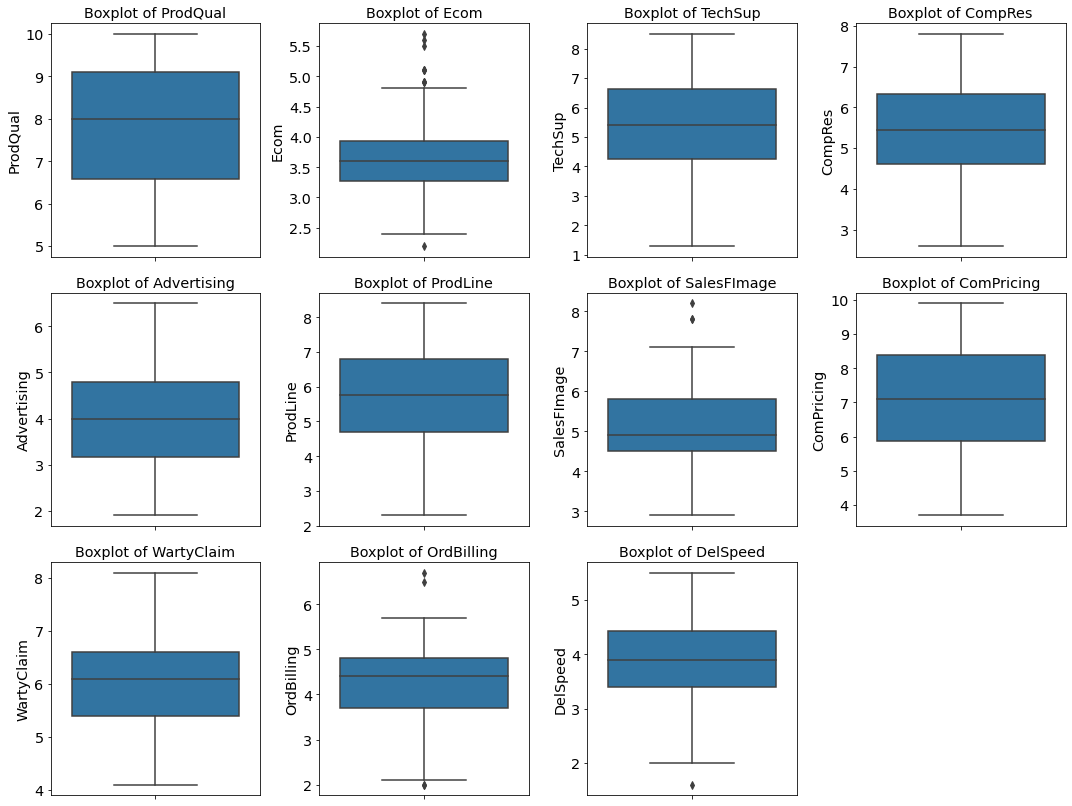

In [200]:
plt.figure(figsize = (15,15))
feature_list = hs_df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = hs_df[feature_list[i]], data = hs_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

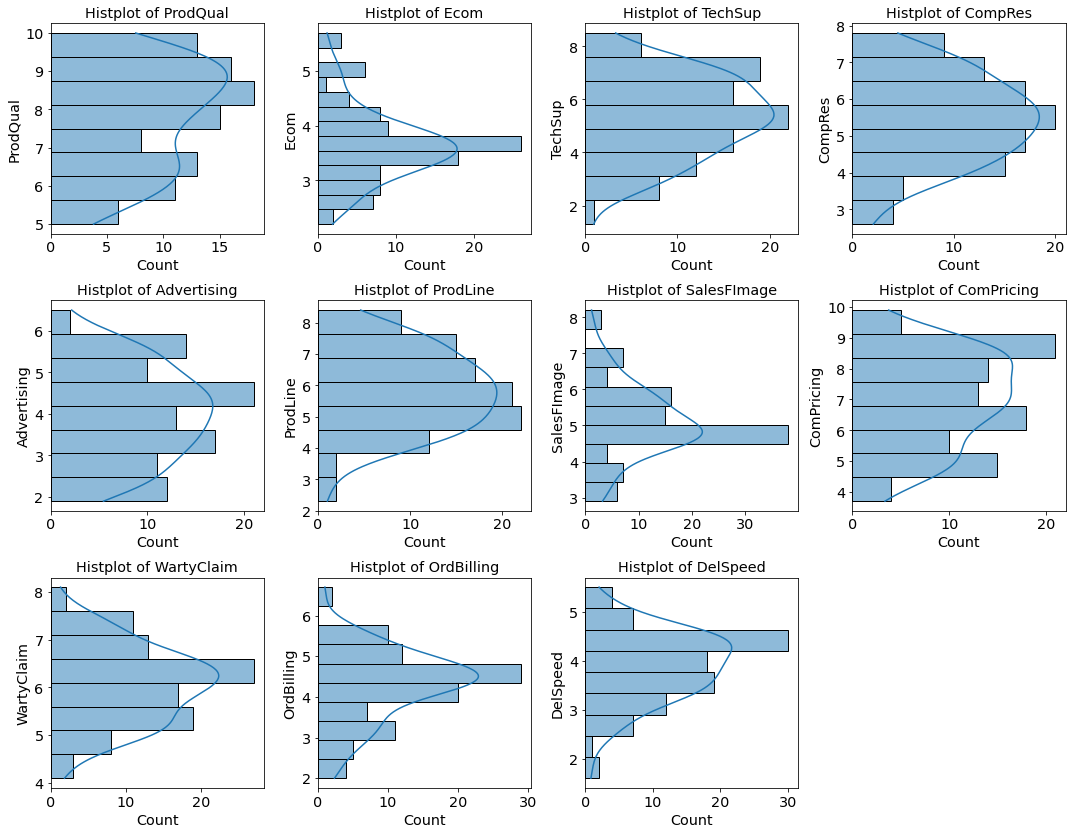

In [201]:
plt.figure(figsize = (15,15))
feature_list = hs_df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.histplot(y = hsdf[feature_list[i]], data = hs_df, kde = True)
    plt.title('Histplot of {}'.format(feature_list[i]))
    plt.tight_layout()

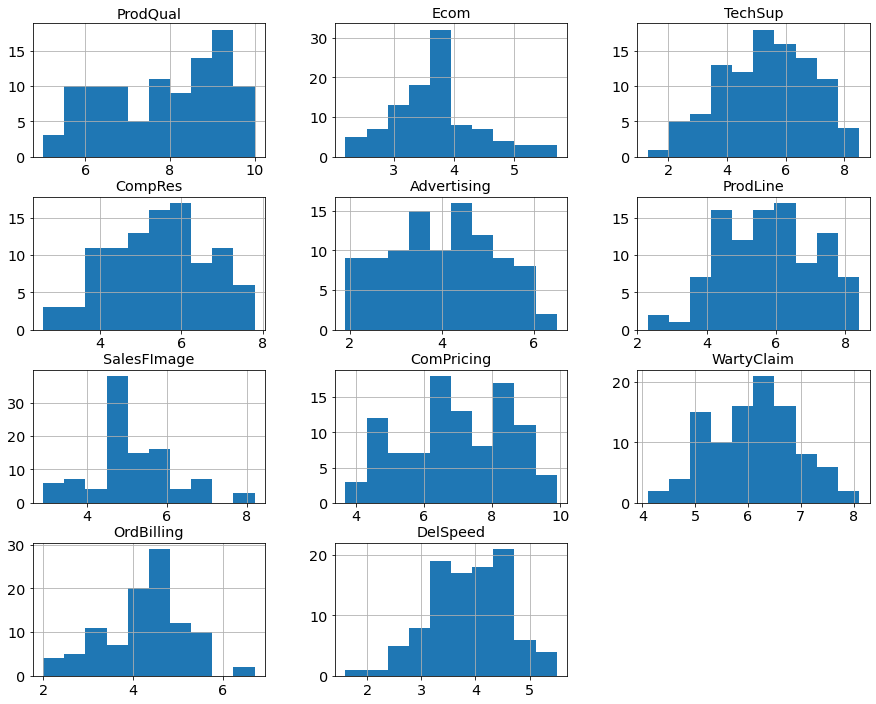

In [203]:
hs_df.hist(figsize=(15,12));

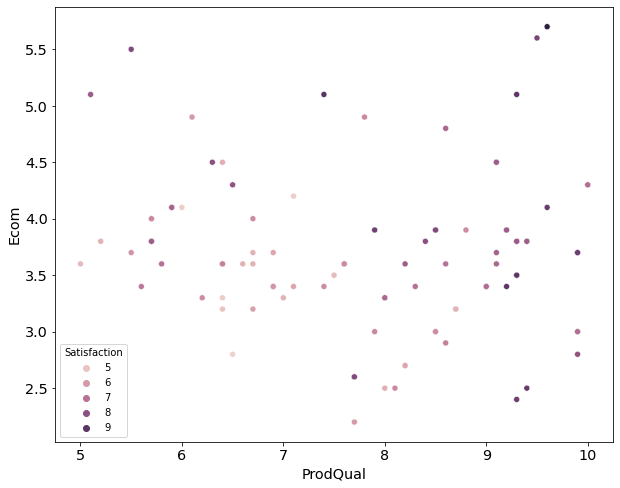

In [149]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=hsdf, x="ProdQual", y="Ecom", hue = 'Satisfaction');

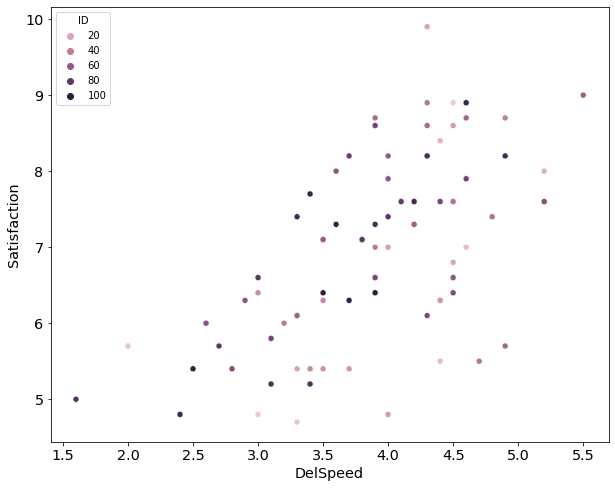

In [206]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=hsdf, x="DelSpeed", y="Satisfaction", hue = 'ID');

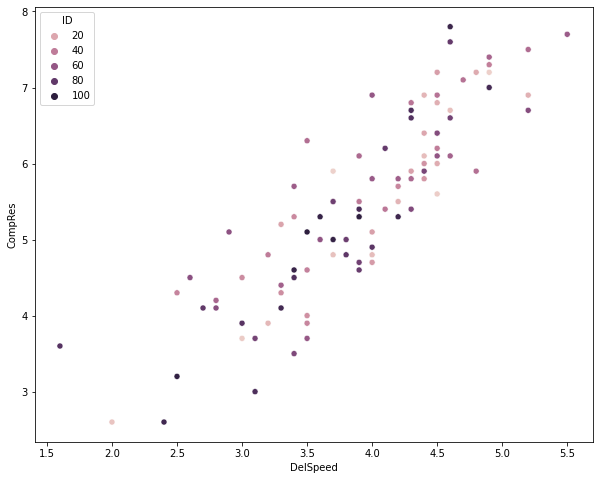

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=hsdf, x="DelSpeed", y="CompRes", hue = 'ID');

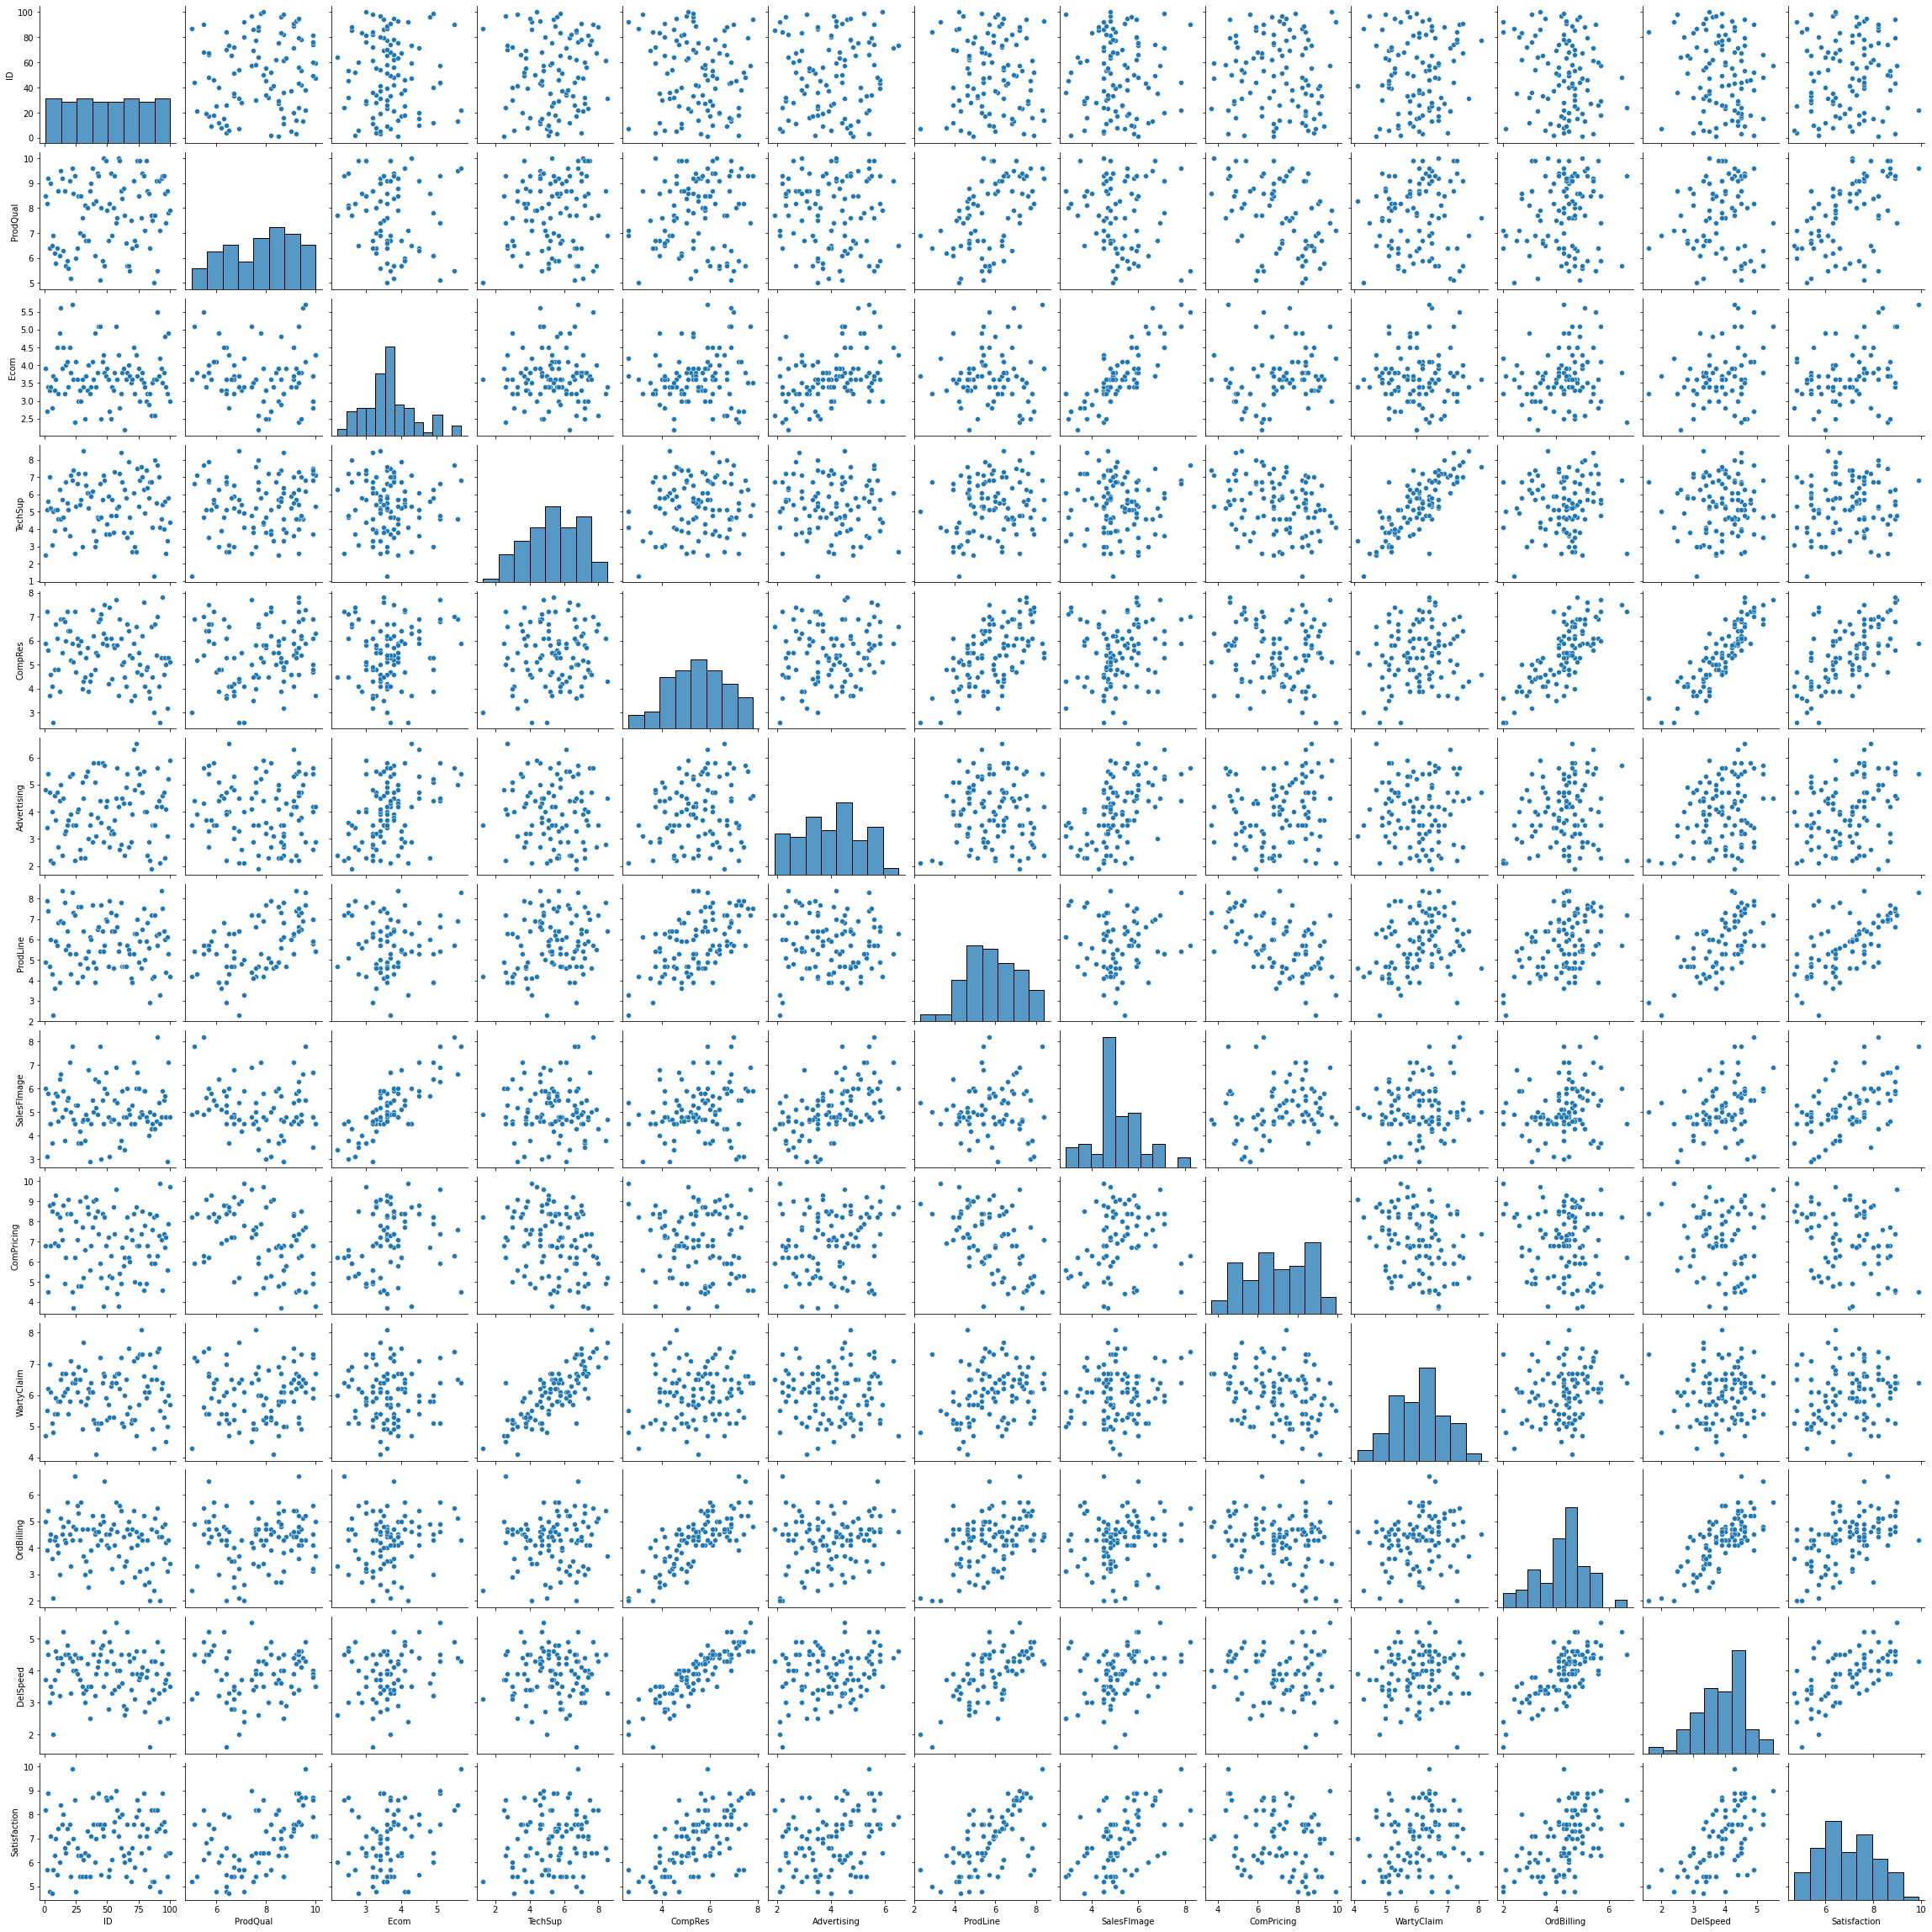

In [115]:
sns.pairplot(hsdf);

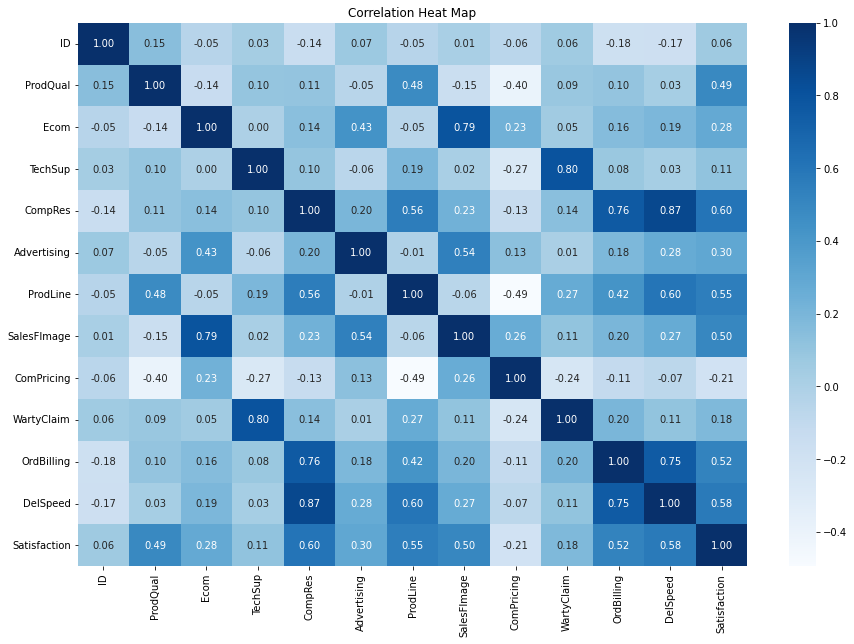

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(hsdf.corr(),annot=True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Heat Map');
plt.show()

### Q1.2. Scale the variables and write the inference for using the type of scaling function for this case study.

### Before Scaling

### Scaling

In [234]:
from scipy.stats import zscore
hsdf_scaled=hs_df.apply(zscore)
hsdf_scaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


In [235]:
hsdf_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProdQual     100 non-null    float64
 1   Ecom         100 non-null    float64
 2   TechSup      100 non-null    float64
 3   CompRes      100 non-null    float64
 4   Advertising  100 non-null    float64
 5   ProdLine     100 non-null    float64
 6   SalesFImage  100 non-null    float64
 7   ComPricing   100 non-null    float64
 8   WartyClaim   100 non-null    float64
 9   OrdBilling   100 non-null    float64
 10  DelSpeed     100 non-null    float64
dtypes: float64(11)
memory usage: 8.7 KB


In [236]:
hs_df.corr().round(3)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000,-0.137,0.096,0.106,-0.053,0.477,-0.152,-0.401,0.088,0.104,0.028
Ecom,-0.137,1.000,0.001,0.140,0.430,-0.053,0.792,0.229,0.052,0.156,0.192
TechSup,0.096,0.001,1.000,0.097,-0.063,0.193,0.017,-0.271,0.797,0.080,0.025
CompRes,0.106,0.140,0.097,1.000,0.197,0.561,0.230,-0.128,0.140,0.757,0.865
Advertising,-0.053,0.430,-0.063,0.197,1.000,-0.012,0.542,0.134,0.011,0.184,0.276
ProdLine,0.477,-0.053,0.193,0.561,-0.012,1.000,-0.061,-0.495,0.273,0.424,0.602
SalesFImage,-0.152,0.792,0.017,0.230,0.542,-0.061,1.000,0.265,0.107,0.195,0.272
ComPricing,-0.401,0.229,-0.271,-0.128,0.134,-0.495,0.265,1.000,-0.245,-0.115,-0.073
WartyClaim,0.088,0.052,0.797,0.140,0.011,0.273,0.107,-0.245,1.000,0.197,0.109
OrdBilling,0.104,0.156,0.080,0.757,0.184,0.424,0.195,-0.115,0.197,1.000,0.751


In [237]:
hsdf_scaled.corr().round(3)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000,-0.137,0.096,0.106,-0.053,0.477,-0.152,-0.401,0.088,0.104,0.028
Ecom,-0.137,1.000,0.001,0.140,0.430,-0.053,0.792,0.229,0.052,0.156,0.192
TechSup,0.096,0.001,1.000,0.097,-0.063,0.193,0.017,-0.271,0.797,0.080,0.025
CompRes,0.106,0.140,0.097,1.000,0.197,0.561,0.230,-0.128,0.140,0.757,0.865
Advertising,-0.053,0.430,-0.063,0.197,1.000,-0.012,0.542,0.134,0.011,0.184,0.276
ProdLine,0.477,-0.053,0.193,0.561,-0.012,1.000,-0.061,-0.495,0.273,0.424,0.602
SalesFImage,-0.152,0.792,0.017,0.230,0.542,-0.061,1.000,0.265,0.107,0.195,0.272
ComPricing,-0.401,0.229,-0.271,-0.128,0.134,-0.495,0.265,1.000,-0.245,-0.115,-0.073
WartyClaim,0.088,0.052,0.797,0.140,0.011,0.273,0.107,-0.245,1.000,0.197,0.109
OrdBilling,0.104,0.156,0.080,0.757,0.184,0.424,0.195,-0.115,0.197,1.000,0.751


In [238]:
hs_df.cov().round(3)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.950,-0.134,0.204,0.179,-0.084,0.877,-0.227,-0.866,0.101,0.135,0.028
Ecom,-0.134,0.491,0.001,0.119,0.339,-0.049,0.595,0.248,0.030,0.102,0.099
TechSup,0.204,0.001,2.342,0.179,-0.108,0.388,0.028,-0.640,1.000,0.114,0.029
CompRes,0.179,0.119,0.179,1.460,0.268,0.892,0.298,-0.239,0.139,0.850,0.768
Advertising,-0.084,0.339,-0.108,0.268,1.270,-0.017,0.655,0.234,0.010,0.193,0.228
ProdLine,0.877,-0.049,0.388,0.892,-0.017,1.730,-0.086,-1.006,0.294,0.518,0.581
SalesFImage,-0.227,0.595,0.028,0.298,0.655,-0.086,1.150,0.438,0.094,0.194,0.214
ComPricing,-0.866,0.248,-0.640,-0.239,0.234,-1.006,0.438,2.387,-0.310,-0.164,-0.083
WartyClaim,0.101,0.030,1.000,0.139,0.010,0.294,0.094,-0.310,0.672,0.150,0.066
OrdBilling,0.135,0.102,0.114,0.850,0.193,0.518,0.194,-0.164,0.150,0.863,0.512


In [239]:
hsdf_scaled.cov().round(3)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010,-0.139,0.097,0.107,-0.054,0.482,-0.153,-0.405,0.089,0.105,0.028
Ecom,-0.139,1.010,0.001,0.142,0.434,-0.053,0.800,0.232,0.052,0.158,0.194
TechSup,0.097,0.001,1.010,0.098,-0.064,0.195,0.017,-0.274,0.805,0.081,0.026
CompRes,0.107,0.142,0.098,1.010,0.199,0.567,0.232,-0.129,0.142,0.765,0.874
Advertising,-0.054,0.434,-0.064,0.199,1.010,-0.012,0.548,0.136,0.011,0.186,0.279
ProdLine,0.482,-0.053,0.195,0.567,-0.012,1.010,-0.062,-0.500,0.276,0.429,0.608
SalesFImage,-0.153,0.800,0.017,0.232,0.548,-0.062,1.010,0.267,0.109,0.197,0.274
ComPricing,-0.405,0.232,-0.274,-0.129,0.136,-0.500,0.267,1.010,-0.247,-0.116,-0.074
WartyClaim,0.089,0.052,0.805,0.142,0.011,0.276,0.109,-0.247,1.010,0.199,0.110
OrdBilling,0.105,0.158,0.081,0.765,0.186,0.429,0.197,-0.116,0.199,1.010,0.759


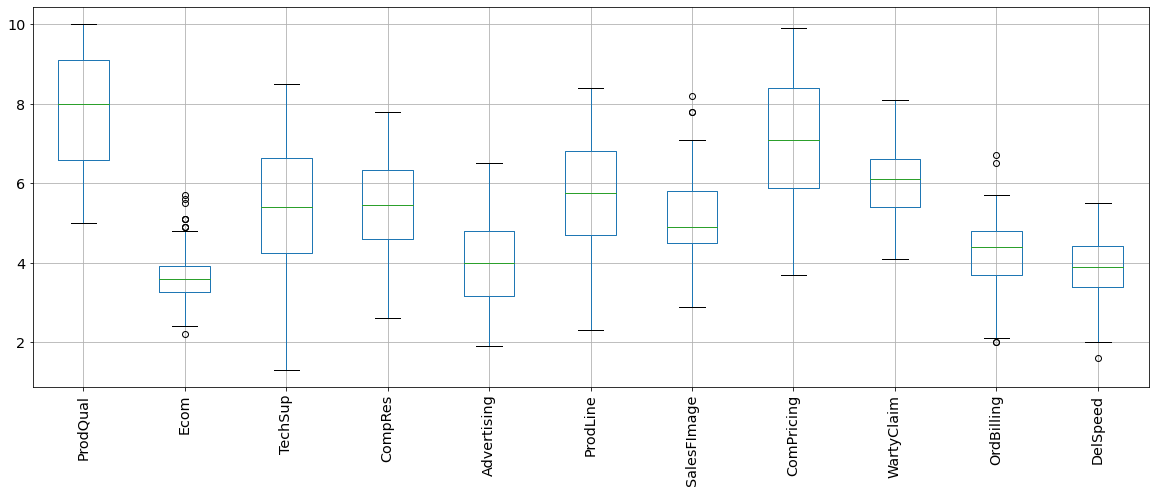

In [240]:
hs_df.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

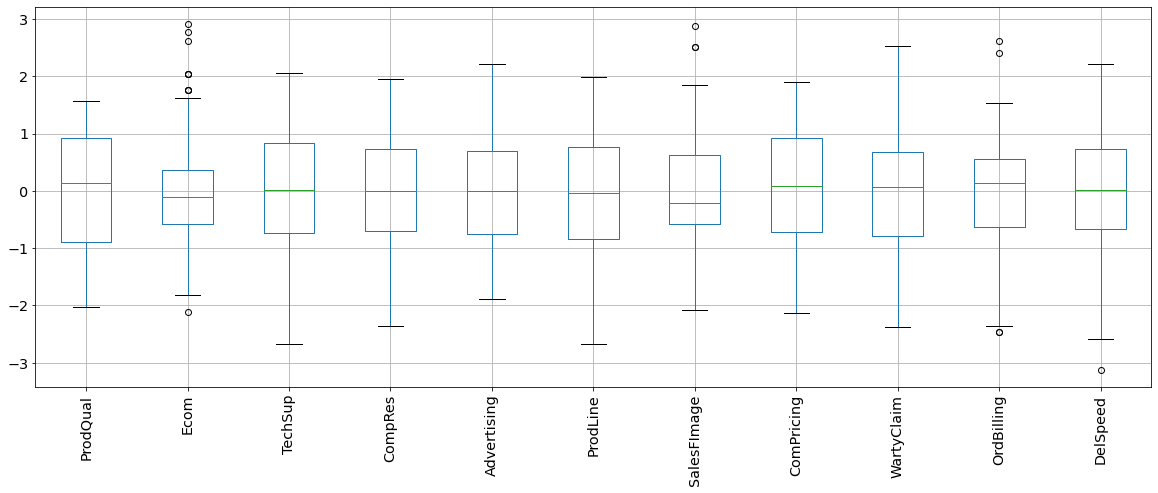

In [241]:
hsdf_scaled.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

### Statistical tests before PCA

### Bartletts Test of Sphericity
#### Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

> $H_O$: All variables in the data are uncorrelated.

> $H_A$: At least one pair of variables in the data are correlated. 

If the null hypothesis cannot be rejected, then PCA is not advisable.

In [242]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(hsdf_scaled)
p_value

1.793370009363244e-96

- Hence, null hypothesis can be rejected

### KMO Test
#### The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

>Generally, if MSA is less than *0.5*, PCA is not recommended, since no reduction is expected. On the other hand, *MSA > 0.7* is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [243]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(hsdf_scaled)
kmo_model

0.653142223068892

### Creating the covariance Matrix

In [244]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

pd.set_option('display.expand_frame_repr', True)
pd.get_option("display.max_rows")
np.set_printoptions(threshold=np.inf)

In [245]:
from sklearn.decomposition import PCA 
pca = PCA(random_state=123)
df_pca = pca.fit_transform(hsdf_scaled)

In [246]:
pd.DataFrame(np.round(pca.get_covariance(),3),columns=hs_df.columns,index=hs_df.columns) #cov matrix

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010,-0.139,0.097,0.107,-0.054,0.482,-0.153,-0.405,0.089,0.105,0.028
Ecom,-0.139,1.010,0.001,0.142,0.434,-0.053,0.800,0.232,0.052,0.158,0.194
TechSup,0.097,0.001,1.010,0.098,-0.064,0.195,0.017,-0.274,0.805,0.081,0.026
CompRes,0.107,0.142,0.098,1.010,0.199,0.567,0.232,-0.129,0.142,0.765,0.874
Advertising,-0.054,0.434,-0.064,0.199,1.010,-0.012,0.548,0.136,0.011,0.186,0.279
ProdLine,0.482,-0.053,0.195,0.567,-0.012,1.010,-0.062,-0.500,0.276,0.429,0.608
SalesFImage,-0.153,0.800,0.017,0.232,0.548,-0.062,1.010,0.267,0.109,0.197,0.274
ComPricing,-0.405,0.232,-0.274,-0.129,0.136,-0.500,0.267,1.010,-0.247,-0.116,-0.074
WartyClaim,0.089,0.052,0.805,0.142,0.011,0.276,0.109,-0.247,1.010,0.199,0.110
OrdBilling,0.105,0.158,0.081,0.765,0.186,0.429,0.197,-0.116,0.199,1.010,0.759


In [247]:
pd.DataFrame(np.round(pca.get_covariance(),3),columns=hsdf_scaled.columns,index=hsdf_scaled.columns) #cov matrix scaled

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010,-0.139,0.097,0.107,-0.054,0.482,-0.153,-0.405,0.089,0.105,0.028
Ecom,-0.139,1.010,0.001,0.142,0.434,-0.053,0.800,0.232,0.052,0.158,0.194
TechSup,0.097,0.001,1.010,0.098,-0.064,0.195,0.017,-0.274,0.805,0.081,0.026
CompRes,0.107,0.142,0.098,1.010,0.199,0.567,0.232,-0.129,0.142,0.765,0.874
Advertising,-0.054,0.434,-0.064,0.199,1.010,-0.012,0.548,0.136,0.011,0.186,0.279
ProdLine,0.482,-0.053,0.195,0.567,-0.012,1.010,-0.062,-0.500,0.276,0.429,0.608
SalesFImage,-0.153,0.800,0.017,0.232,0.548,-0.062,1.010,0.267,0.109,0.197,0.274
ComPricing,-0.405,0.232,-0.274,-0.129,0.136,-0.500,0.267,1.010,-0.247,-0.116,-0.074
WartyClaim,0.089,0.052,0.805,0.142,0.011,0.276,0.109,-0.247,1.010,0.199,0.110
OrdBilling,0.105,0.158,0.081,0.765,0.186,0.429,0.197,-0.116,0.199,1.010,0.759


### Getting eigen values and eigen vector

#### Eigen Values

In [248]:
eigenvalues=pca.explained_variance_
print('Eigenvalues:',np.round(eigenvalues,2))

Eigenvalues: [3.46 2.58 1.71 1.1  0.62 0.56 0.41 0.25 0.21 0.13 0.1 ]


#### Eigen vectors

In [249]:
eigenvec=pca.components_
print('Eigenvectors:',np.round(eigenvec,2))

Eigenvectors: [[-0.13 -0.17 -0.16 -0.47 -0.18 -0.39 -0.2   0.15 -0.21 -0.44 -0.47]
 [-0.31  0.45 -0.23  0.02  0.36 -0.28  0.47  0.41 -0.19  0.03  0.07]
 [ 0.06 -0.24 -0.61  0.21 -0.09  0.12 -0.24  0.05 -0.6   0.17  0.23]
 [ 0.64  0.27 -0.19 -0.21  0.32  0.2   0.22 -0.33 -0.19 -0.24 -0.2 ]
 [ 0.23  0.42 -0.02  0.03 -0.8   0.12  0.2   0.25 -0.03  0.03 -0.04]
 [-0.56  0.26 -0.11 -0.03 -0.2   0.1   0.1  -0.71 -0.14 -0.12  0.03]
 [ 0.19  0.06 -0.02 -0.01 -0.06 -0.61  0.   -0.31 -0.03  0.66 -0.23]
 [ 0.14 -0.12  0.46  0.51 -0.05 -0.33  0.17 -0.1  -0.44 -0.37  0.07]
 [ 0.03 -0.54 -0.36  0.09 -0.15 -0.08  0.64 -0.09  0.32 -0.1  -0.02]
 [ 0.07  0.28 -0.39  0.53  0.04 -0.23 -0.35 -0.05  0.44 -0.3  -0.12]
 [ 0.18  0.06 -0.05 -0.36 -0.08 -0.39 -0.08 -0.1   0.13 -0.19  0.78]]


In [250]:
var_exp=np.round(pca.explained_variance_ratio_,2)*100
var_exp

array([31., 23., 15., 10.,  6.,  5.,  4.,  2.,  2.,  1.,  1.])

#### Scree Plot

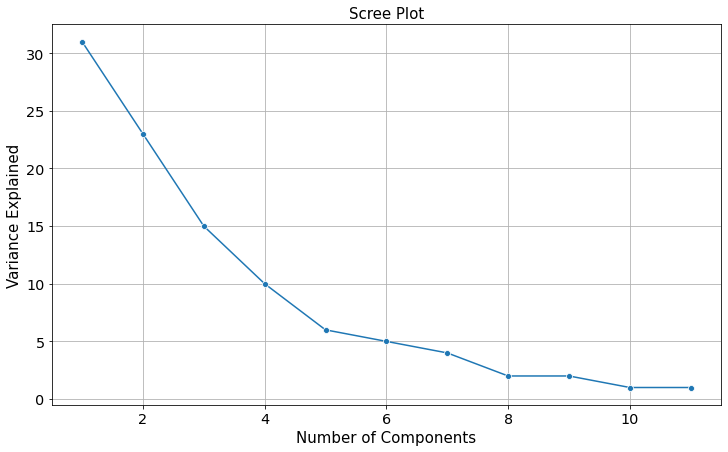

In [251]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [252]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31154285, 0.54344255, 0.69716768, 0.79594551, 0.8513477 ,
       0.90151895, 0.9380206 , 0.96047074, 0.97897558, 0.99105209,
       1.        ])

In [253]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

from sklearn.decomposition import PCA
pca = PCA(n_components=8,random_state=123)
df_pca = pca.fit_transform(hsdf_scaled)
df_pca.transpose() # Component output

array([[ 7.95507962e-02, -1.10096634e+00, -2.19706653e+00,
         1.56293289e+00,  7.67570385e-01,  2.90862177e+00,
         5.29319132e+00,  1.47659077e+00, -6.13947615e-01,
        -4.23660076e-01,  5.76252311e-01,  1.86757037e+00,
        -2.66029481e+00, -1.15437973e+00, -1.98252867e+00,
        -1.19534642e+00, -6.29210603e-01, -1.94912563e+00,
        -4.40654330e-01, -1.18679105e+00,  1.32903312e+00,
        -3.07501457e+00, -1.22862294e+00, -1.95215660e+00,
         2.77114349e-01, -3.38635080e-01, -1.76471720e+00,
         1.03510170e+00, -1.29479142e+00,  1.66262708e+00,
         1.44608491e-01,  2.11462740e+00,  1.06970726e+00,
        -1.09408090e-01,  1.80536022e+00,  2.12248520e+00,
         6.22051111e-01, -2.57411754e+00, -3.44966983e-01,
         1.21539637e+00,  1.25487586e+00,  1.67930781e-01,
        -1.82095895e+00, -2.33269255e+00, -8.73288881e-01,
        -1.65347263e+00, -1.03184895e+00, -3.12115015e+00,
        -1.07236222e+00, -7.97675229e-01,  1.98945764e+0

In [254]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(hsdf_scaled),index=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
df_pca_loading.shape

(8, 11)

In [255]:
df_pca_loading = np.round(df_pca_loading,2)

In [256]:
df_pca_loading.style.highlight_max(color = 'lightgreen', axis = 0)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
PC0,-0.130000,-0.170000,-0.160000,-0.470000,-0.180000,-0.390000,-0.200000,0.150000,-0.210000,-0.440000,-0.470000
PC1,-0.310000,0.450000,-0.230000,0.020000,0.360000,-0.280000,0.470000,0.410000,-0.190000,0.030000,0.070000
PC2,0.060000,-0.240000,-0.610000,0.210000,-0.090000,0.120000,-0.240000,0.050000,-0.600000,0.170000,0.230000
PC3,0.640000,0.270000,-0.190000,-0.210000,0.320000,0.200000,0.220000,-0.330000,-0.190000,-0.240000,-0.200000
PC4,0.230000,0.420000,-0.020000,0.030000,-0.800000,0.120000,0.200000,0.250000,-0.030000,0.030000,-0.040000
PC5,-0.560000,0.260000,-0.110000,-0.030000,-0.200000,0.100000,0.100000,-0.710000,-0.140000,-0.120000,0.030000
PC6,0.190000,0.060000,-0.020000,-0.010000,-0.060000,-0.610000,0.000000,-0.310000,-0.030000,0.660000,-0.230000
PC7,0.140000,-0.120000,0.460000,0.510000,-0.050000,-0.330000,0.170000,-0.100000,-0.440000,-0.370000,0.070000


### linear equation of first P

In [257]:
for i in range(0,11):
    print("(",np.round(pca.components_[0][i],2),")",'*',hsdf_scaled.columns[i], end=' + ')

( -0.13 ) * ProdQual + ( -0.17 ) * Ecom + ( -0.16 ) * TechSup + ( -0.47 ) * CompRes + ( -0.18 ) * Advertising + ( -0.39 ) * ProdLine + ( -0.2 ) * SalesFImage + ( 0.15 ) * ComPricing + ( -0.21 ) * WartyClaim + ( -0.44 ) * OrdBilling + ( -0.47 ) * DelSpeed + 

_______________________________________________________________________________________________________________________________

# Part 2: Clustering:
## The State_wise_Health_income.csv dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.

### Q 2.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc, etc)

In [5]:
import matplotlib.pylab as pylab
params = {
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [6]:
swdf = pd.read_csv('State_wise_Health_income.csv')

In [7]:
swdf.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [8]:
swdf.tail()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403
296,296,Groggan,2070,838,3179,166767


In [9]:
swdf.shape

(297, 6)

In [10]:
swdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [11]:
sw_df = swdf.copy()

In [12]:
sw_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
sw_df.dtypes

States               object
Health_indeces1       int64
Health_indices2       int64
Per_capita_income     int64
GDP                   int64
dtype: object

In [14]:
np.round(sw_df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2630.15,2038.51,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.63,468.94,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.92,1491.85,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.12,167167.99,22.0,8721.0,137173.0,313092.0,728575.0


In [15]:
sw_df.duplicated().sum()

0

- No duplicate values

In [16]:
sw_df.isnull().sum().sum()

0

- No Null values

In [20]:
cat=[]
num=[]
for i in sw_df.columns:
    if sw_df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['States']
['Health_indeces1', 'Health_indices2', 'Per_capita_income', 'GDP']


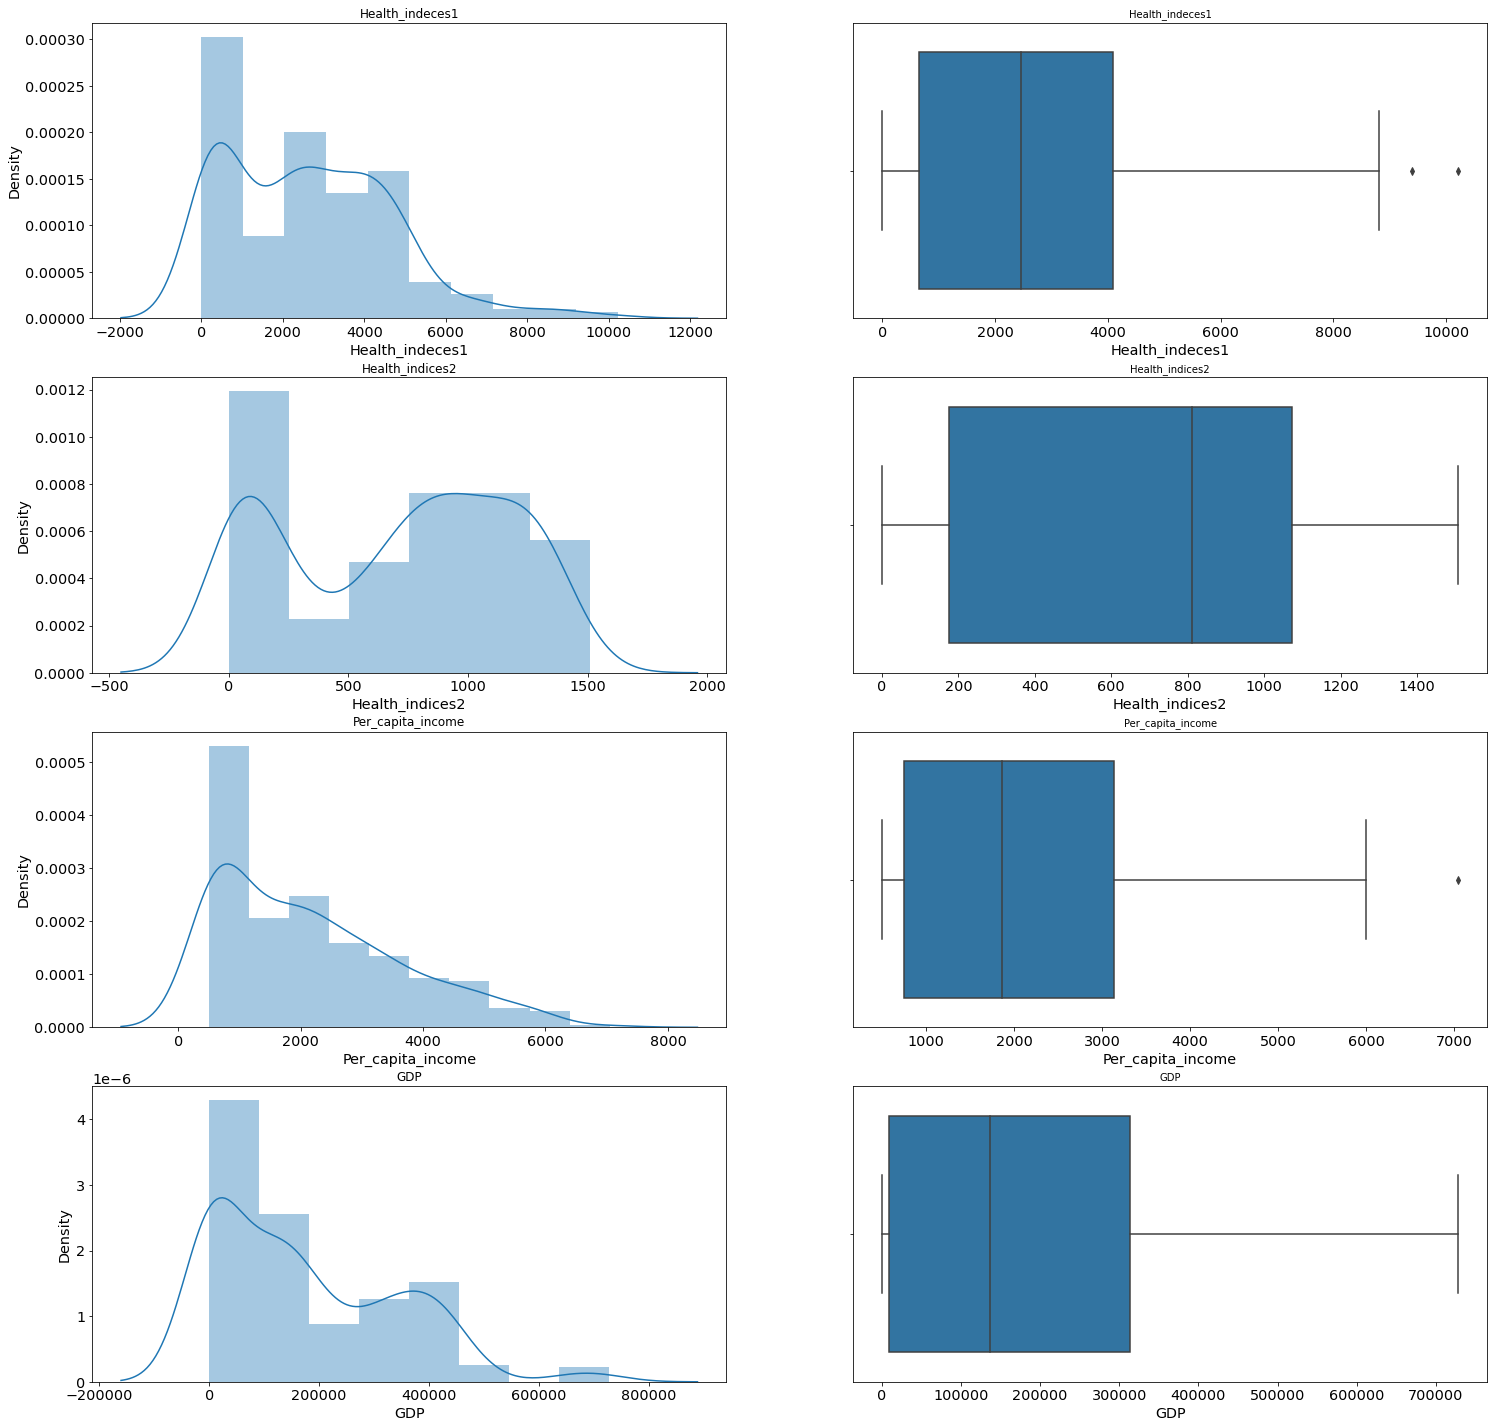

In [63]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(25,25))
for i,j in zip(num,axes):
    a=sns.distplot(sw_df[i],ax=j[0])
    a.set_title(i,fontsize=12)
    a = sns.boxplot(sw_df[i],ax=j[1])
    a.set_title(i,fontsize=10)

In [21]:
swdf_num= sw_df.select_dtypes(include=['float64','int64'])

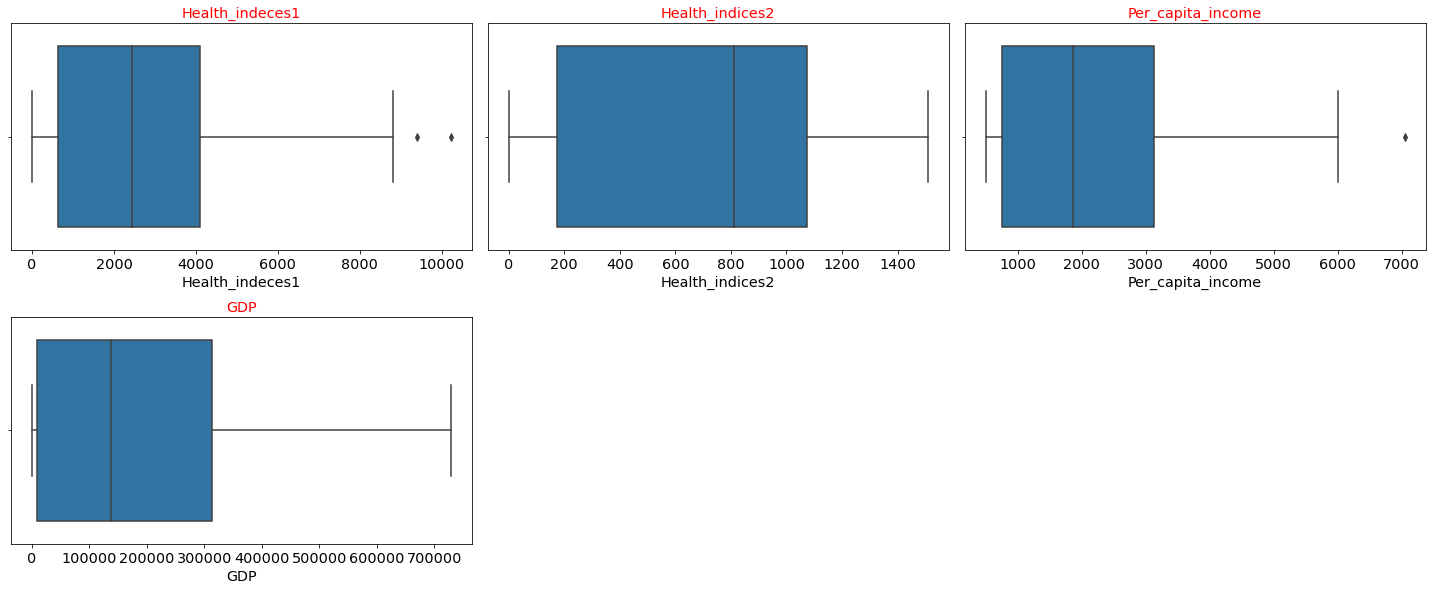

In [65]:
data_plot=swdf_num
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

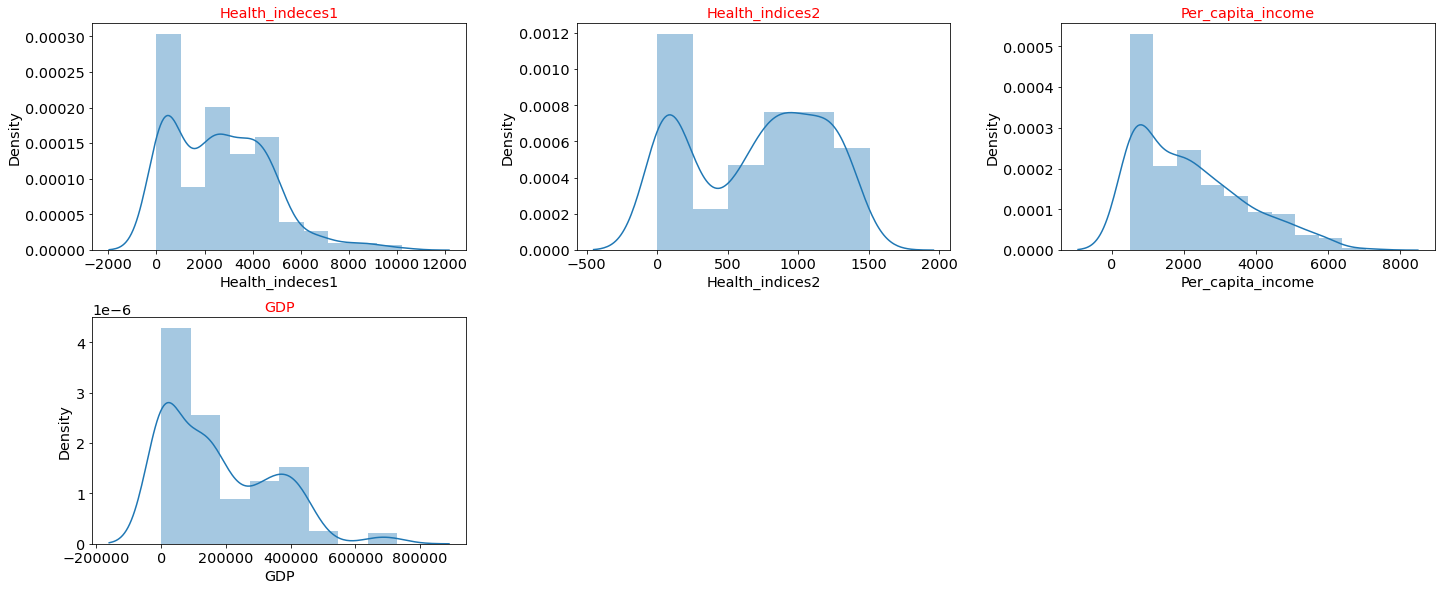

In [66]:
data_plot=swdf_num
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,3,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

### Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()

In [22]:
swdf_scaled = pd.DataFrame(X.fit_transform(swdf_num),columns=swdf_num.columns)

In [23]:
swdf_scaled.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.087506,-1.340654,-1.069544,-1.035304
1,-0.562708,-0.101746,0.371362,-0.604838
2,-0.971048,-0.842955,-0.706968,-0.882536
3,-1.198067,-1.428232,-1.063502,-1.044730
4,-1.271283,-1.464545,-1.093716,-1.046096


In [24]:
swdf_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,-6.803387e-17,1.001688,-1.297327,-0.977436,-0.088032,0.719311,3.729034
Health_indices2,297.0,1.252272e-17,1.001688,-1.481634,-1.107825,0.248566,0.810346,1.739527
Per_capita_income,297.0,-1.566274e-16,1.001688,-1.112517,-0.943986,-0.196003,0.658066,3.284732
GDP,297.0,8.032295e-17,1.001688,-1.046096,-0.993971,-0.224273,0.829852,3.319468


### Hierarchical Clustering

In [25]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

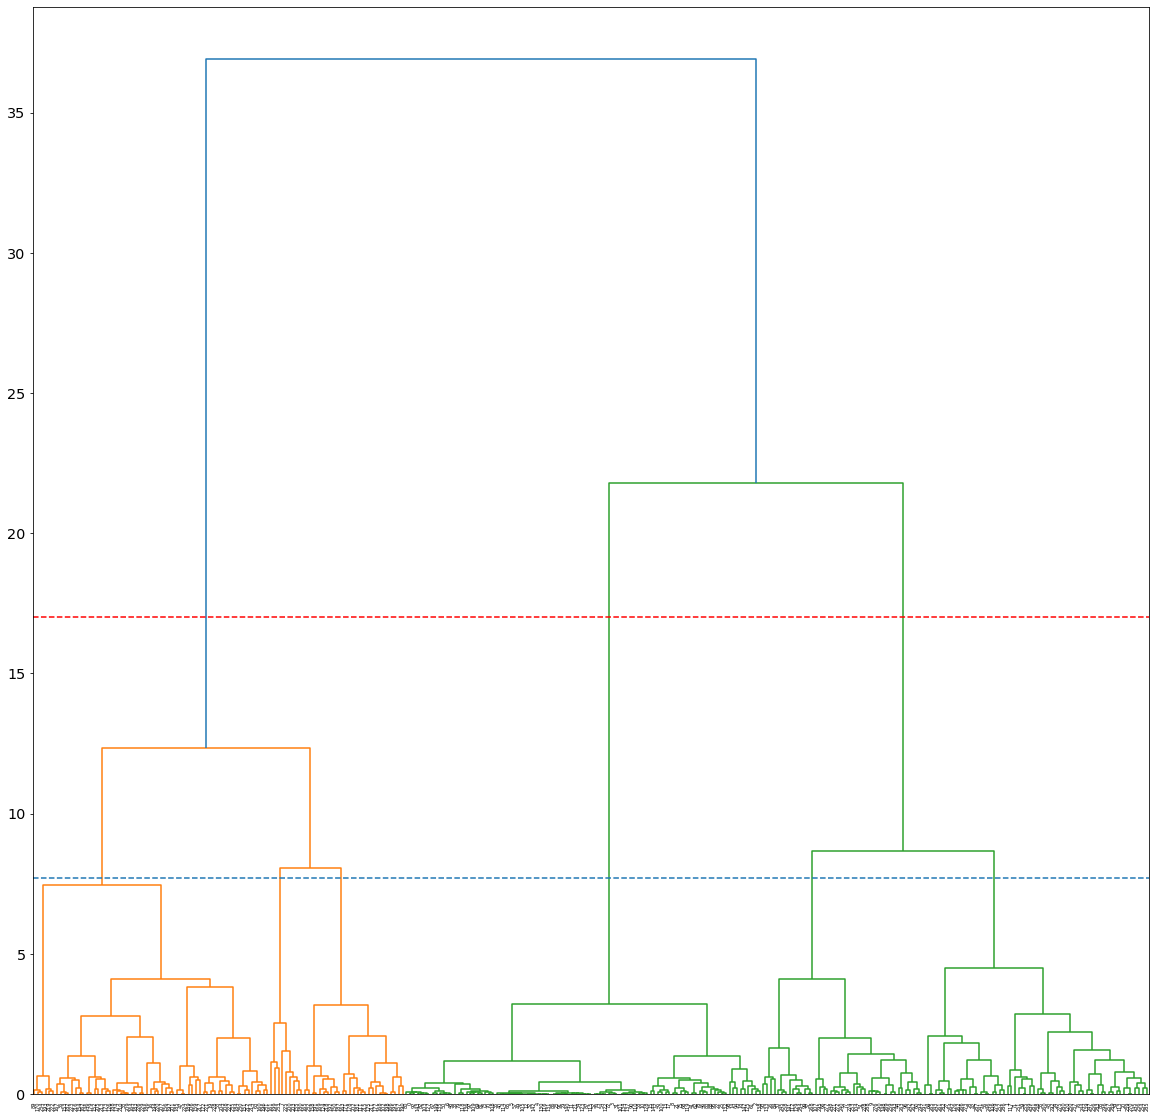

In [46]:
x_full = swdf_scaled.values
plt.figure(figsize=(20, 20))
Z = sch.dendrogram(sch.linkage(x_full, method = "ward", metric='euclidean'))
plt.axhline(linestyle='--', y=17, color='r')
plt.axhline(linestyle='--', y=7.7) 
plt.show()

### KMeans

In [30]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [31]:
wss =[] 
a=[1,2,3,4,5,6,7,8,9,10]
sil_score= []
for i in a:
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(swdf_scaled)
    wss.append(KM.inertia_)

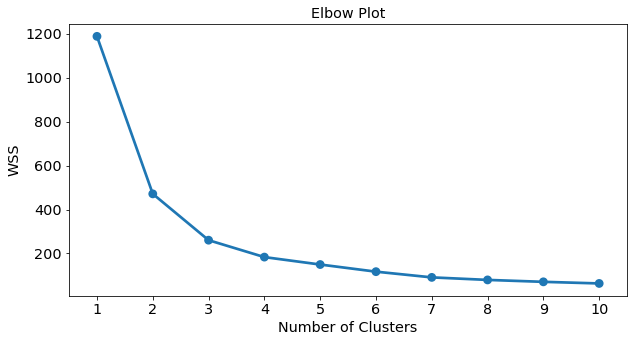

In [32]:
plt.figure(figsize=(10,5))
sns.pointplot(a, wss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS');

In [33]:
ss={1:0}
for i in range(2, 11):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
 y=clusterer.fit_predict(swdf_scaled)
 s =silhouette_score(swdf_scaled, y )
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))


The Average Silhouette Score for 2 clusters is 0.53092
The Average Silhouette Score for 3 clusters is 0.53354
The Average Silhouette Score for 4 clusters is 0.55205
The Average Silhouette Score for 5 clusters is 0.52026
The Average Silhouette Score for 6 clusters is 0.52997
The Average Silhouette Score for 7 clusters is 0.55595
The Average Silhouette Score for 8 clusters is 0.53301
The Average Silhouette Score for 9 clusters is 0.5138
The Average Silhouette Score for 10 clusters is 0.51142


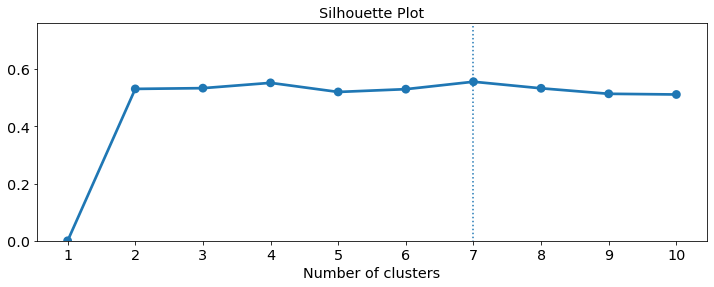

In [34]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.75,linestyles='dotted')
ax.set(ylim=(0, 0.76))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters');

In [47]:
clusterer = KMeans(n_clusters =6, init = 'k-means++', random_state = 1)

clusterer.fit_predict(swdf_scaled)

labels = clusterer.labels_


In [48]:
sw_df['KMEANS_LABELS'] = labels

In [49]:
sw_df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,KMEANS_LABELS
0,Bachevo,417,66,564,1823,1
1,Balgarchevo,1485,646,2710,73662,3
2,Belasitsa,654,299,1104,27318,1
3,Belo_Pole,192,25,573,250,1
4,Beslen,43,8,528,22,1


### Cluster Profiling

In [50]:
sw_df.KMEANS_LABELS.value_counts(1)*100
# label has majority data

1    32.996633
0    19.191919
3    18.855219
5    15.824916
2    10.101010
4     3.030303
Name: KMEANS_LABELS, dtype: float64

In [51]:
sw_df.KMEANS_LABELS.value_counts()

1    98
0    57
3    56
5    47
2    30
4     9
Name: KMEANS_LABELS, dtype: int64

In [52]:
sw_df.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,KMEANS_LABELS
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,2630.151515,693.632997,2156.915825,174601.117845,2.010101
std,2038.505431,468.944354,1491.854058,167167.992863,1.685560
min,-10.000000,0.000000,500.000000,22.000000,0.000000
25%,641.000000,175.000000,751.000000,8721.000000,1.000000
50%,2451.000000,810.000000,1865.000000,137173.000000,1.000000
75%,4094.000000,1073.000000,3137.000000,313092.000000,3.000000
max,10219.000000,1508.000000,7049.000000,728575.000000,5.000000


In [53]:
clust_profile=sw_df
clust_profile=clust_profile.groupby('KMEANS_LABELS').mean()
clust_profile['freq']=sw_df.KMEANS_LABELS.value_counts().sort_index()
np.round(clust_profile,2).T

KMEANS_LABELS,0,1,2,3,4,5
Health_indeces1,4816.07,444.40,4116.97,2362.12,8327.67,2815.98
Health_indices2,1140.82,108.02,1293.00,848.38,1369.67,675.96
Per_capita_income,2319.30,686.81,4728.33,3160.00,5592.44,1530.96
GDP,399053.82,7241.66,342126.67,143591.27,426759.11,133085.91
freq,57.00,98.00,30.00,56.00,9.00,47.00


In [54]:
sw_df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,KMEANS_LABELS
0,Bachevo,417,66,564,1823,1
1,Balgarchevo,1485,646,2710,73662,3
2,Belasitsa,654,299,1104,27318,1
3,Belo_Pole,192,25,573,250,1
4,Beslen,43,8,528,22,1


In [55]:
silhouette_samples(swdf_scaled,labels).min()

-0.022892537665382358